# Machine Learning - Classification

Author: Chetana Iyer

This notebook looks at basic applications of SVD, Linear Discriminant Analysis (LDA), Support Vector Machines (SVM), and Decision Trees for classification following HW3 in EE 399A, Introduction to Machine Learning for Science and Engineering, a UW course designed by J. Nathan Kutz for Spring 2023.

## Abstract: 
In this assignment, we will analyze the MNIST data set of hand written digits and build different classifiers to classify and distinguish the digits from one another. The MNIST dataset has been used extensively in research for developing and evaluating image recognition algorithms. It is often used as a benchmark dataset to compare the performance of different machine learning models for tasks such as classification and object detection.
Our goal is to build off this and evaluate these classification algorithms.Through these exercises, we aim to gain a deeper understanding of the underlying similarities across these different approaches for machine learning



## 1. Introduction

This assignment is about performing an analysis of the MNIST data set, which is a well-known dataset of handwritten digits. The goal is to perform an SVD analysis of the digit images, to understand the singular value spectrum and the necessary modes for good image reconstruction, and deepen our understanding of  of the U, Σ, and V matrices.

Once the data is projected into PCA space, the task is to build classifiers to identify individual digits in the training set. Specifically, we need to pick two or three digits and build linear classifiers (LDA) to identify/classify them. We also need to quantify the accuracy of the separation of the most difficult and the most easy to separate digits with LDA on the test data.

Finally, we need to compare the performance between LDA, SVM, and decision trees on the hardest and easiest pair of digits to separate. It is crucial to discuss the performance of the classifier on both the training and test sets to understand how well the model generalizes to new data.

## 2. Theoretical Background

One of the key concepts that underlies this assignment is the concept of **Singular Value Decomposition**. In this assignment, Singular Value Decomposition is used to extract the Singular value spectrum - which provides information about the contribution of each singular value or eigen value to the variation of the data. By examining the singular value spectrum, we can determine the number of modes or principal components that are needed for good image reconstruction by keeping the principal components with the highest singular values. By selecting a suitable number of modes, we can reduce the dimensionality of the data while retaining its most important features.

Another important concept is the **Linear Discriminant Analysis**. Linear Discriminat Analysis also known as LDA is a statistical method used to classify sets of samples into two or more classes. This method works by finding a linear combination of features which distinguish the classes from one another. The resulting linear combinations are then used as a linear classifier to predict and classify new sets of samples. LDA is a *supervised learning algorithm*, meaning that the algorithm requires labelled input data to train the classifier. The resulting transformation maps the original higher-dimensional feature space onto a lower-dimensional subspsace while preserving the information essential to classification. 

Similarly, **Support Vector Machine** or SVM is a supervised learning algorithm which also works for classification. The goal of SVM is to find a hyperplane that best divides the classes and maximizes the margins of the closest point between each class. These classes are known as support vectors, and SVM can dynamically solve both linear and non-linear classification problems with the use of a kernel function that transforms the features into a higher dimensional space.

The final most important concept for this assignment is Decision trees. **Decision Trees** are another supervized machine learning algorthim used for both regression and classifcation - but works by breaking down a dataset into smaller and smaller subsets based off different features in order to identify patterns. 

## 3. Algorithm Implementation and Visualizations

Load in given data set

In [2]:

# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0 # Scale the pixel values to [0, 1]

/Users/chetanaiyer/miniconda/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


U shape: (784, 784)
s shape: (784,)
Vt shape: (784, 70000)


### Problem 1,2,3,4 : Compute SVD analysis, Calculate how many modes necessary for image reconstruction & interpret the U, E and V matrices, project onto PCA space

In [ ]:
# Reshape each image into a column vector
X = X.T

# Perform SVD on the data
U, s, Vt = svd(X, full_matrices=False)

After doing SVD analysis on the digits, calculate how many modes were necessary for image reconstruction by summing over the singular values - and finding the threshold where the magnitude of the sum is 90% of the cumulative sum - and using this to calculate the r value of the digit space.

In [32]:
total_sum = sum(s)
cumulative_sum = 0 
idx = -1 

for i,x in enumerate(S):
    cumulative_sum += x
    if cumulative_sum >= 0.9 * total_sum:
        idx = i+1
        break
        
threshold = S[idx-1] # Set the threshold for the "elbow point"


In [33]:
idx = np.argmax(s < threshold) # Find the index of the "elbow point"
r = idx
print('Rank r of the digit space:', r) #will be using this many modes 

Rank r of the digit space: 343


The U matrix contains the left singular vectors of the data matrix X: each column of it corresponds to a "basis image" that captures the major patterns/structure in the MNIST images. Σ is a diagonal matrix which contains the singular values of X -> these values represent the significance of each basis image in the SVD decomp. Finally, V is a matrix which contains the right singular vectors of X where each column corresponds to a basis pixel capturing the prominent variations within the pixesl of the MNIST images  

### Plotting the 3 selected modes of 2,3, and 5 onto PCA space

/Users/chetanaiyer/miniconda/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


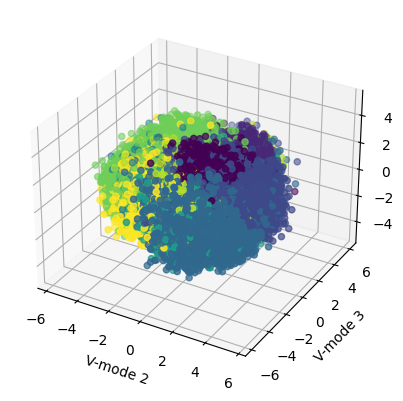

In [36]:
V = Vt.T

# Select the columns corresponding to V-modes 2, 3, and 5
V_selected = V[:, [2, 3, 5]]

# Project the data onto the selected V-modes
X_proj = np.dot(X, V_selected)

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=y.astype(int), s=20)

# Set the labels and limits of the plot
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')

plt.show()

### Problems a,b,c,d,e and f  : Build an LDA to classify 2 digits, 3 digits, Classify the 2 most and least difficult digits to distinguish, construct SVM and Decision trees & classification accuracy, Compare performance of all 3 on hardest and easiest digits to seperate

In [47]:
#a: building a linear classifier to identify 4,9

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

# Convert the target labels to integers
y = y.astype(int)

# Select only the images corresponding to digits 4 and 9
X_train = X[(y == 4) | (y == 9)][::2]
y_train = y[(y == 4) | (y == 9)][::2]

# Create a binary label vector (1 for digit 4, -1 for digit 9)
y_train_binary = (y_train == 4).astype(int) * 2 - 1

# Train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_binary)

# Test the classifier on a subset of the test data
X_test = X[(y == 4) | (y == 9)][1::2]
y_test = y[(y == 4) | (y == 9)][1::2]
y_test_binary = (y_test == 4).astype(int) * 2 - 1
y_pred_binary = lda.predict(X_test)

# Compute the classification accuracy
accuracy = (y_pred_binary == y_test_binary).mean()
print(f"Classification accuracy: {accuracy:.2f}")


/Users/chetanaiyer/miniconda/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Classification accuracy: 0.96


In [48]:
#b: building a linear classifier to identify 2,3,5

# Select only the images corresponding to digits 2, 3 and 5
X_train = X[(y == 2) | (y == 3) | (y == 5)][::2]
y_train = y[(y == 2) | (y == 3) | (y == 5)][::2]

# Create a label vector
label = np.zeros(len(y_train))
label[y_train == 2] = 0
label[y_train == 3] = 1
label[y_train == 5] = 2

# Train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, label)

# Select a different subset of test data for evaluation
X_eval = X[(y == 2) | (y == 3) | (y == 5)][1::2]
y_eval = y[(y == 2) | (y == 3) | (y == 5)][1::2]
y_eval_true = np.zeros(len(y_eval))
y_eval_true[y_eval == 2] = 0
y_eval_true[y_eval == 3] = 1
y_eval_true[y_eval == 5] = 2

# Test the classifier on the evaluation data
y_eval_pred = lda.predict(X_eval)

# Compute the classification accuracy
accuracy = (y_eval_pred == y_eval_true).mean()
print(f"Classification accuracy: {accuracy:.2f}")

Classification accuracy: 0.93


Calculate which digits are easiest to distinguish by looping through all combinations of digits from the data set

In [51]:

#first: define the list of digits to compare -0-9
digit_pairs = list(itertools.combinations(range(10), 2))

# Initialize variables for tracking best pair and its accuracy
best_pair = None
best_accuracy = 0

# Iterate over all digit pairs and compute accuracy with LDA
for pair in digit_pairs:
    # Select only the images corresponding to the two digits for training
    X_train = X[(y == pair[0]) | (y == pair[1])][::2]
    y_train = y[(y == pair[0]) | (y == pair[1])][::2]
    y_train[y_train == pair[0]] = 0
    y_train[y_train == pair[1]] = 1
    
    # Train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    # Select a subset of test data for evaluation
    X_eval = X[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true = y[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true[y_eval_true == pair[0]] = 0
    y_eval_true[y_eval_true == pair[1]] = 1
    
    # Test the classifier on the evaluation data and compute accuracy
    y_eval_pred = lda.predict(X_eval)
    accuracy = accuracy_score(y_eval_true, y_eval_pred)
    
    # Update the best pair if accuracy is higher than previous best
    if accuracy > best_accuracy:
        best_pair = pair
        best_accuracy = accuracy

print(f"The two most easiest digits to separate are {best_pair[0]} and {best_pair[1]} with an accuracy of {best_accuracy:.2f}")

The two most easiest digits to separate are 6 and 9 with an accuracy of 1.00


Calculate which digits are hardest to distinguish by looping through all combinations of digits from the data set

In [52]:
# Define a list of digit pairs to compare
digit_pairs = list(itertools.combinations(range(10), 2))

# Initialize variables for tracking worst pair and its accuracy
worst_pair = None
worst_accuracy = 1

# Iterate over all digit pairs and compute accuracy with LDA
for pair in digit_pairs:
    # Select only the images corresponding to the two digits for training
    X_train = X[(y == pair[0]) | (y == pair[1])][::2]
    y_train = y[(y == pair[0]) | (y == pair[1])][::2]
    y_train[y_train == pair[0]] = 0
    y_train[y_train == pair[1]] = 1
    
    # Train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    # Select a subset of test data for evaluation
    X_eval = X[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true = y[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true[y_eval_true == pair[0]] = 0
    y_eval_true[y_eval_true == pair[1]] = 1
    
    # Test the classifier on the evaluation data and compute accuracy
    y_eval_pred = lda.predict(X_eval)
    accuracy = accuracy_score(y_eval_true, y_eval_pred)
    
    # Update the worst pair if accuracy is lower than previous worst
    if accuracy < worst_accuracy:
        worst_pair = pair
        worst_accuracy = accuracy

print(f"The two most difficult digits to separate are {worst_pair[0]} and {worst_pair[1]} with an accuracy of {worst_accuracy:.2f}")

The two most difficult digits to separate are 5 and 8 with an accuracy of 0.95


### General Accuracy of SVM and Decision tree in classifying all 10 digits

In [95]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)

# SVM classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for SVM: {accuracy}")

# Decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for decision tree: {accuracy}")

Accuracy for SVM: 0.9762857142857143
Accuracy for decision tree: 0.8686666666666667


### Evaluating SVM and Decision tree performance on 5 vs 8: hardest

In [82]:
X = mnist.data / 255.0
y = mnist.target
# Convert the target labels to integers
y = y.astype(int)

# Set the most difficult pair of digits to separate
digit1 = 5
digit2 = 8

# Filter the data to only include the selected digits
X_filtered = X[(y == digit1) | (y == digit2)]
y_filtered = y[(y == digit1) | (y == digit2)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train and test the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Train and test the decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

# Print the results
print('SVM accuracy: {:.2f}%'.format(svm_acc * 100))
print('Decision tree accuracy: {:.2f}%'.format(tree_acc * 100))


SVM accuracy: 96.80%
Decision tree accuracy: 95.97%


### Evaluating SVM and Decision tree performance on 6 vs 9: hardest

In [5]:
# Set the most difficult pair of digits to separate
digit1 = 6
digit2 = 9

# Filter the data to only include the selected digits
X_filtered = X[(y == digit1) | (y == digit2)]
y_filtered = y[(y == digit1) | (y == digit2)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train and test the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Train and test the decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

# Print the results
print('SVM accuracy: {:.2f}%'.format(svm_acc * 100))
print('Decision tree accuracy: {:.2f}%'.format(tree_acc * 100))


SVM accuracy: 99.89%
Decision tree accuracy: 99.24%


## 4. Results & Conclusion

problem 2: ![here](graph1.png)

#The R value is 343, which is the rank of digit space

problem 4: ![here](graph1.png) #brain image 

#problem A: the LDA's classifcation accuracy for distinguishing 4 and 9 is 0.96 

#problem B: the LDA's classifcation accuracy for distinguishing 2,3,5 is 0.93

#problem C: 5 and 8 were calculated to be the hardest to distinguish with an accuracy of .95

#problem D: 6 and 9 were calculated to be the easiest to distinguish with an accuracy of 1.0

#problem E: The overall accuracy for classification between the SVM and Decision tree methods were 0.97628 and 0.8666

#problem F: On the hard-to-distinguish digits: the accuracy for SVM was 96.80%, and 95.97% for decision tree
For the east to distinguish digits: the accuracy for SVM was 99.89%, and 99.24% for decision tree




